In [1]:
import copy
import time
import random
import datetime
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, MaxPool2D,
    Flatten, Dense, Input, Concatenate, LeakyReLU, Add,
    MaxPooling2D, AveragePooling2D, GlobalAvgPool2D
)

from tensorflow.keras.datasets import mnist



# LOAD LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

#전처리
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# How to check if Keras is using GPU?

from keras import backend as K

from keras.optimizers import SGD, Adam, Nadam

In [2]:
from keras.models import Sequential, Model
from keras import layers
from keras import Input

In [3]:
origin_train = pd.read_csv('./drive/My Drive/ml_data/mental/train.csv', index_col=0)
origin_test = pd.read_csv('./drive/My Drive/ml_data/mental/test_x.csv', index_col=0)
origin_submission = pd.read_csv('./drive/My Drive/ml_data/mental/sample_submission.csv', index_col=0)

In [5]:
# train_dummy = origin_train[]
# type(corrmat['voted'])

In [6]:
origin_train.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
drop_val = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA','QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE','tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13']

train = origin_train.drop(drop_val, axis = 1)
test = origin_test.drop(drop_val, axis = 1)

In [ ]:
#labelencoding
onehot = OneHotEncoder()
label = LabelEncoder()

train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

X_train = pd.get_dummies(train, columns=['gender_code','age_group_code','race_code','religion_code'])
X_test = pd.get_dummies(test, columns=['gender_code','age_group_code','race_code','religion_code'])

In [ ]:
drop2 = ['gender','age_group','race','religion']
X_train = X_train.drop(drop2, axis = 1)
X_test = X_test.drop(drop2, axis = 1)

In [ ]:
y_train = X_train['voted'] - 1
X_train = X_train.drop(['voted'], axis = 1)

In [ ]:
y_train

index
0        1
1        1
2        0
3        0
4        0
        ..
45527    1
45528    1
45529    0
45530    0
45531    0
Name: voted, Length: 45532, dtype: int64

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)

In [ ]:
input_tensor = Input(shape=(33,))
x = layers.Dense(128, activation='relu')(input_tensor)
block_1_output = layers.Dense(128, activation='relu')(x)

x = layers.Dense(128, activation='relu')(block_1_output)
x = layers.Dense(128, activation='relu')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Dense(128, activation='relu')(block_2_output)
x = layers.Dense(128, activation='relu')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Dense(128, activation='relu')(block_3_output)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(10, activation='relu')(x)
output_tensor = layers.Dense(2, activation='softmax')(x)

model = Model(input_tensor, output_tensor)
model.summary()
model.compile(
    optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 33)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          4352        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          16512       dense_1[0][0]                    
_______________________________________________________________________________________

In [ ]:
history = model.fit(
    x=X_train, 
    y=y_train, 
    batch_size=32, 
    validation_data=(X_val, y_val), 
    epochs=30
)

Epoch 1/30
1281/1281 [==============================] - 4s 3ms/step - loss: 0.5785 - accuracy: 0.6803 - val_loss: 0.5733 - val_accuracy: 0.6864
Epoch 2/30
1281/1281 [==============================] - 4s 3ms/step - loss: 1075.5067 - accuracy: 0.6875 - val_loss: 0.5736 - val_accuracy: 0.6930
Epoch 3/30
1281/1281 [==============================] - 4s 3ms/step - loss: 0.5641 - accuracy: 0.6906 - val_loss: 0.5672 - val_accuracy: 0.6917
Epoch 4/30
1281/1281 [==============================] - 4s 3ms/step - loss: 690.3481 - accuracy: 0.6933 - val_loss: 0.5666 - val_accuracy: 0.6937
Epoch 5/30
1281/1281 [==============================] - 4s 3ms/step - loss: 2146.2642 - accuracy: 0.6936 - val_loss: 0.5772 - val_accuracy: 0.6869
Epoch 6/30
1281/1281 [==============================] - 4s 3ms/step - loss: 0.5607 - accuracy: 0.6931 - val_loss: 0.5676 - val_accuracy: 0.7016
Epoch 7/30
1281/1281 [==============================] - 4s 3ms/step - loss: 0.5644 - accuracy: 0.6958 - val_loss: 0.5674 - val_a

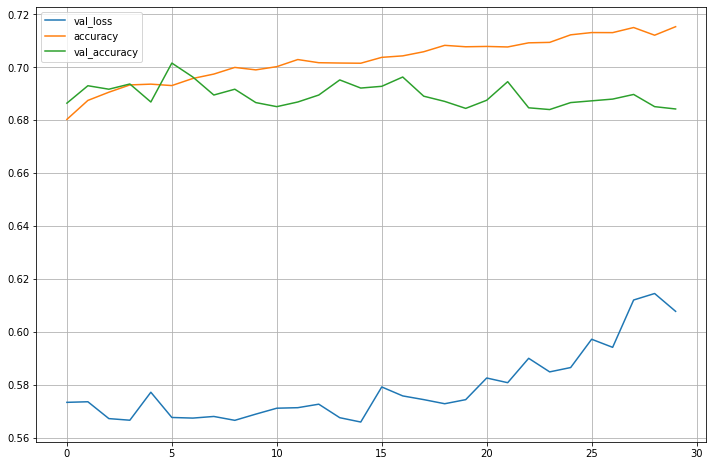

In [ ]:
plt.figure(figsize=(12,8))
# plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()